## Project Goals

1. Analyse a Kaggle data set on heart failure predictors, using a step-wise backward eliminiation to find the main predictors of death from heart disease. Mainly for my own edification. I'm not actually trying to cure heart disease. The data categorizes paitents by those who died from heart disease, and those who did not. The outome is a binary variable, hence a logistic regression is appropriate.
2. Implement the logistic regression in Python
3. Analyse the accuracy of the model.

Data from:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#### Backwards Elimination Procedure
Step 1 - Select a significance level for variables to stay in the model. I am using the standard p=0.05<br>
Step 2 - Fit the full model with all predictors <br>
Step 3 - Consider the predictor with the highest p-value. If this p-value is higher than the selected significance level, go to step 4. If the hightest p-value is lower than the selected significance level, stop removing predictors as the model is fully fitted.<br>
Step 4 - Remove the predictor from the model and re-run the regression. Go to Step 3<br>

## Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import statsmodels.api as sm

## Load the dataset

Let's have an initial look at the data

In [2]:
raw_data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

In [3]:
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
raw_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no null values to contend with in this data set.

### Data included in the dataset
* **age** - Paitent age<br>
* **anaemia** - Decrease of red blood cells or hemoglobin (boolean)<br>
* **creatinine_phosphokinase** - Level of the CPK enzyme in the blood (mcg/L)<br>
* **diabetes** - If the patient has diabetes (boolean)<br>
* **ejection_fraction** - Percentage of blood leaving the heart at each contraction (percentage)<br>
* **high_blood_pressure** - If the patient has hypertension (boolean)<br>
* **platelet** - Platelets in the blood (kiloplatelets/mL)<br>
* **serum_creatinine** - Level of serum creatinine in the blood (mg/dL)<br>
* **serum_sodium** - Level of serum sodium in the blood (mEq/L)<br>
* **sex** - (binary) 1 = Male, 0 = Female <br>
* **smoking** - If the patient smokes or not (boolean)<br>
* **time** -Follow-up period (days)<br>
* **DEATH_EVENT** - If the patient deceased during the follow-up period (boolean)<br>


Fortunately, the categorical data columns have already been converted into boolean values, so there is no need to dummify the data with the pandas.get_dummies() method

A heatmap should give an initial indication of the correlations we can expect to see present in the final model.

<AxesSubplot:>

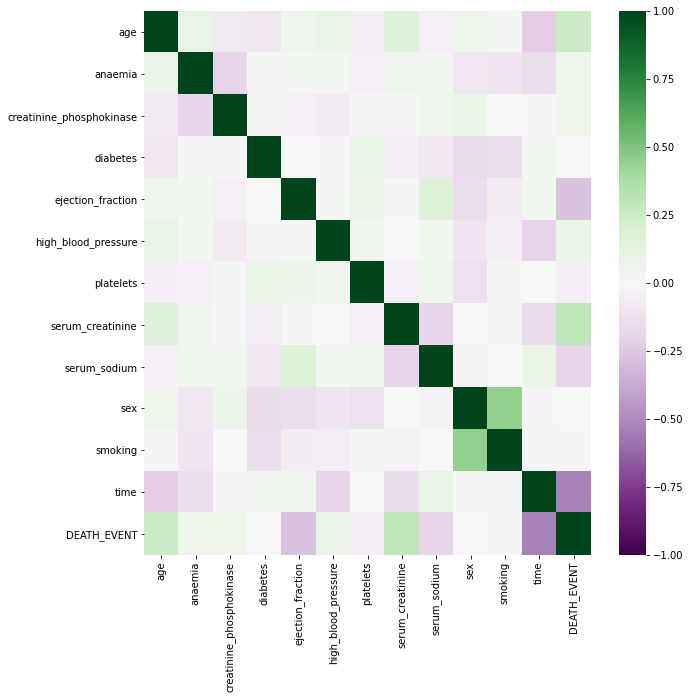

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), vmin=-1, cmap ='PRGn')

The heatmap indicates that age, ejection_fraction, serum_creatine, serum_sodium, and time appear to correlate most with death in this data set. Surprisingly, smoking and diabetes don't correlate strongly with heart disease in this data set.

## Perform the Backwards Eliminiation

Note: There are only 299 rows in the whole data set which is too small for a reliable logistic regression. However, this notebook is intended to be an example of the concept of backwards logistic regressions models, rather than an actual attempt to predict to death by heart disease. So I think I'll just carry right on.

#### Bakwards Elimination Step 1 - Choose a p-value.
I will use the standard p value = 0.05<br>
#### Backwards Elimination Step 2 - Fit the model with all predictors




In [6]:
x = raw_data.loc[:, 'age': 'time']
y = raw_data['DEATH_EVENT']

In [7]:
x=sm.add_constant(x)
model=sm.OLS(y, x).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           2.35e-27
Time:                        14:16:34   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6636      0.695      2.392      0.017       0.295       3.032
age                          0.0058      0.002      3.088      0.002       0.002       0.009
anaemia                     -0.0028      0.044     -0.062      0.950      -0.090       0.085
creatinine_phosphokinase  3.427e-05   2.25e-05      1.525      0.128   -9.96e-06    7.85e-05
diabetes                     0.0193      0.044      0.437      0.662      -0.068       0.106
ejection_fraction           -0.0098      0.002     -5.333      0.000      -0.013      -0.006
high_blood_pressure         -0.0143      0.046     -0.313      0.754      -0.104       0.076
platelets                 -8.37e-08   2.21e-07     -0.379      0.705   -5.18e-07    3.51e-07
serum_creatinine             0.0853      0.021      4.017      0.000       0.043       0.127
serum_sodium                -0.0076      0.005     -1.513      0.131      -0.017       0.002
sex                         -0.0637      0.051     -1.247      0.214      -0.164       0.037
smoking                     -0.0057      0.051     -0.112      0.911      -0.106       0.095
time                        -0.0027      0.000     -9.415      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.068   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.014
Skew:                           0.306   Prob(JB):                       0.0182
Kurtosis:                       2.483   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Backwards Elimination Step 3

The highest highest p-value is that associated with the 'anaemia' column. Remove anaemia from the model, and re-run.

In [9]:
x = x.drop(labels='anaemia', axis='columns')
model=sm.OLS(y, x).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     18.65
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           5.31e-28
Time:                        14:16:35   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             255.8
Df Residuals:                     287   BIC:                             300.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6650      0.694      2.400      0.017       0.300       3.031
age                          0.0058      0.002      3.094      0.002       0.002       0.009
creatinine_phosphokinase  3.453e-05    2.2e-05      1.568      0.118   -8.81e-06    7.79e-05
diabetes                     0.0193      0.044      0.439      0.661      -0.067       0.106
ejection_fraction           -0.0098      0.002     -5.343      0.000      -0.013      -0.006
high_blood_pressure         -0.0142      0.046     -0.313      0.755      -0.104       0.075
platelets                -8.313e-08    2.2e-07     -0.377      0.706   -5.17e-07     3.5e-07
serum_creatinine             0.0852      0.021      4.024      0.000       0.044       0.127
serum_sodium                -0.0076      0.005     -1.524      0.129      -0.017       0.002
sex                         -0.0635      0.051     -1.247      0.213      -0.164       0.037
smoking                     -0.0055      0.051     -0.107      0.915      -0.106       0.095
time                        -0.0027      0.000     -9.514      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.042   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.996
Skew:                           0.306   Prob(JB):                       0.0184
Kurtosis:                       2.483   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Backwards Elimination Step 3 (again)

Oddly, the highest highest p-value is now that associated with the 'smoking' column. Remove from the model, and re-run.

In [11]:
x = x.drop(labels='smoking', axis='columns')
model=sm.OLS(y, x).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     20.58
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.14e-28
Time:                        14:16:35   Log-Likelihood:                -115.91
No. Observations:                 299   AIC:                             253.8
Df Residuals:                     288   BIC:                             294.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6649      0.693      2.404      0.017       0.302       3.028
age                          0.0058      0.002      3.101      0.002       0.002       0.009
creatinine_phosphokinase  3.464e-05    2.2e-05      1.577      0.116   -8.59e-06    7.79e-05
diabetes                     0.0198      0.044      0.452      0.651      -0.066       0.106
ejection_fraction           -0.0098      0.002     -5.351      0.000      -0.013      -0.006
high_blood_pressure         -0.0141      0.045     -0.311      0.756      -0.104       0.075
platelets                -8.555e-08   2.19e-07     -0.391      0.696   -5.16e-07    3.45e-07
serum_creatinine             0.0853      0.021      4.037      0.000       0.044       0.127
serum_sodium                -0.0076      0.005     -1.527      0.128      -0.017       0.002
sex                         -0.0659      0.046     -1.439      0.151      -0.156       0.024
time                        -0.0027      0.000     -9.531      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.048   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.022
Skew:                           0.307   Prob(JB):                       0.0181
Kurtosis:                       2.484   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Backwards Elimination Step 3 (repeat)

Continue removing the predictor with the highest p-value until the the highest p-value is below 0.05. I'm not printing out every summary here to save space.

In [13]:
x = x.drop(labels='high_blood_pressure', axis='columns')
model=sm.OLS(y, x).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     22.93
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           2.41e-29
Time:                        14:16:35   Log-Likelihood:                -115.96
No. Observations:                 299   AIC:                             251.9
Df Residuals:                     289   BIC:                             288.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6688      0.691      2.414      0.016       0.308       3.030
age                          0.0057      0.002      3.093      0.002       0.002       0.009
creatinine_phosphokinase  3.508e-05   2.19e-05      1.603      0.110   -7.98e-06    7.82e-05
diabetes                     0.0200      0.044      0.459      0.647      -0.066       0.106
ejection_fraction           -0.0098      0.002     -5.359      0.000      -0.013      -0.006
platelets                 -8.84e-08   2.18e-07     -0.405      0.686   -5.18e-07    3.41e-07
serum_creatinine             0.0855      0.021      4.056      0.000       0.044       0.127
serum_sodium                -0.0077      0.005     -1.546      0.123      -0.017       0.002
sex                         -0.0645      0.045     -1.417      0.158      -0.154       0.025
time                        -0.0027      0.000     -9.663      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.021   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.094
Skew:                           0.312   Prob(JB):                       0.0175
Kurtosis:                       2.490   Cond. No.                     9.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
x = x.drop(labels='platelets', axis='columns')
model=sm.OLS(y, x).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     25.85
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           4.95e-30
Time:                        14:16:35   Log-Likelihood:                -116.04
No. Observations:                 299   AIC:                             250.1
Df Residuals:                     290   BIC:                             283.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6580      0.690      2.403      0.017       0.300       3.016
age                          0.0058      0.002      3.114      0.002       0.002       0.009
creatinine_phosphokinase  3.482e-05   2.18e-05      1.594      0.112   -8.16e-06    7.78e-05
diabetes                     0.0187      0.043      0.430      0.668      -0.067       0.104
ejection_fraction           -0.0099      0.002     -5.395      0.000      -0.013      -0.006
serum_creatinine             0.0857      0.021      4.072      0.000       0.044       0.127
serum_sodium                -0.0078      0.005     -1.569      0.118      -0.018       0.002
sex                         -0.0626      0.045     -1.385      0.167      -0.152       0.026
time                        -0.0027      0.000     -9.673      0.000      -0.003      -0.002
==============================================================================
Omnibus:                        9.741   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                7.988
Skew:                           0.313   Prob(JB):                       0.0184
Kurtosis:                       2.500   Cond. No.                     3.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x = x.drop(labels='diabetes', axis='columns')
model=sm.OLS(y, x).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     29.60
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           9.54e-31
Time:                        14:16:35   Log-Likelihood:                -116.14
No. Observations:                 299   AIC:                             248.3
Df Residuals:                     291   BIC:                             277.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7031      0.681      2.501      0.013       0.363       3.043
age                          0.0057      0.002      3.093      0.002       0.002       0.009
creatinine_phosphokinase  3.484e-05   2.18e-05      1.597      0.111   -8.09e-06    7.78e-05
ejection_fraction           -0.0099      0.002     -5.405      0.000      -0.013      -0.006
serum_creatinine             0.0853      0.021      4.061      0.000       0.044       0.127
serum_sodium                -0.0080      0.005     -1.626      0.105      -0.018       0.002
sex                         -0.0656      0.045     -1.471      0.142      -0.153       0.022
time                        -0.0027      0.000     -9.682      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.073   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.151
Skew:                           0.314   Prob(JB):                       0.0170
Kurtosis:                       2.490   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
x = x.drop(labels='sex', axis='columns')
model=sm.OLS(y, x).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     34.04
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           4.47e-31
Time:                        14:16:35   Log-Likelihood:                -117.25
No. Observations:                 299   AIC:                             248.5
Df Residuals:                     292   BIC:                             274.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6566      0.682      2.431      0.016       0.315       2.998
age                          0.0055      0.002      2.977      0.003       0.002       0.009
creatinine_phosphokinase  3.224e-05   2.18e-05      1.480      0.140   -1.06e-05    7.51e-05
ejection_fraction           -0.0095      0.002     -5.234      0.000      -0.013      -0.006
serum_creatinine             0.0854      0.021      4.062      0.000       0.044       0.127
serum_sodium                -0.0080      0.005     -1.617      0.107      -0.018       0.002
time                        -0.0027      0.000     -9.677      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.347   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.484
Skew:                           0.325   Prob(JB):                       0.0144
Kurtosis:                       2.492   Cond. No.                     3.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
x = x.drop(labels='creatinine_phosphokinase', axis='columns')
model=sm.OLS(y, x).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     40.24
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.94e-31
Time:                        14:16:35   Log-Likelihood:                -118.36
No. Observations:                 299   AIC:                             248.7
Df Residuals:                     293   BIC:                             270.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.6292      0.683      2.387      0.018       0.286       2.973
age                   0.0053      0.002      2.861      0.005       0.002       0.009
ejection_fraction    -0.0096      0.002     -5.303      0.000      -0.013      -0.006
serum_creatinine      0.0856      0.021      4.060      0.000       0.044       0.127
serum_sodium         -0.0075      0.005     -1.520      0.130      -0.017       0.002
time                 -0.0027      0.000     -9.706      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       11.385   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.205
Skew:                           0.340   Prob(JB):                       0.0100
Kurtosis:                       2.473   Cond. No.                     6.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
x = x.drop(labels='serum_sodium', axis='columns')
model=sm.OLS(y, x).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     49.51
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           8.01e-32
Time:                        14:16:35   Log-Likelihood:                -119.54
No. Observations:                 299   AIC:                             249.1
Df Residuals:                     294   BIC:                             267.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6138      0.140      4.388      0.000       0.338       0.889
age                   0.0053      0.002      2.881      0.004       0.002       0.009
ejection_fraction    -0.0101      0.002     -5.645      0.000      -0.014      -0.007
serum_creatinine      0.0913      0.021      4.389      0.000       0.050       0.132
time                 -0.0027      0.000     -9.773      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.265   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.643
Skew:                           0.335   Prob(JB):                       0.0133
Kurtosis:                       2.506   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now there are no more predictors with a p-value > 0.05 and we have arrived at the final set of predictors for the model, and the backwards eliminiation is complate.

## Train and Test the Model

I am splitting the data into 80% training, 20% testing

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = log_reg.predict(x_test)

In [28]:
confusion_matrix(y_test, y_pred)

array([[35,  6],
       [ 7, 12]], dtype=int64)

In [29]:
accuracy_score(y_test,y_pred)

0.7833333333333333

Running the model repeatedly gives confusion matrix and accuracy scores that show the model making between 75% and 80% of predictions correctly. There is a high variability from prediction to prediction, given that the training and test data are split randomly and the overall data set is relatively small. Of course, this variability would be expected to decrease as the number of records in the data set increased.

#### Making the CAP curve

A cumulative accuracy profile curve will give an indication of how much better this model is at predicting positive outcomes (heart disease deaths) than simple random selection.

It is important to begin by plotting the expected accuracy of prediction when taking samples at random, which is simply a straight line from 0 to the total number of deaths. This will be the baseline against which the CAP of the model will be compared.

In [30]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count

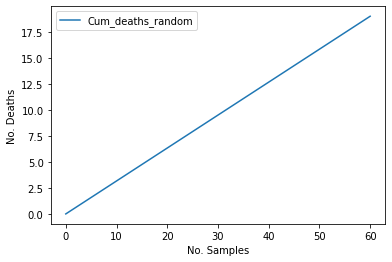

In [36]:
plt.plot([0, total], [0, one_count], label='Cum_deaths_random')
plt.xlabel('No. Samples')
plt.ylabel('No. Deaths')
plt.legend()

Now, plot the cumulative number of deaths when taking the samples in order of most likely to die to least likely, as predicted by the model.

In [32]:
lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]

In [33]:
x_cap = np.arange(0, total+1)
y_cap = np.append([0], np.cumsum(lm))

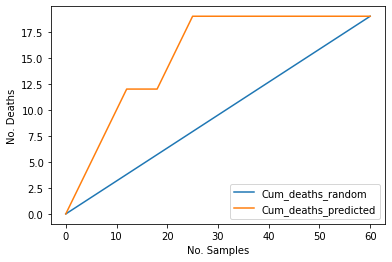

In [37]:
plt.plot([0, total], [0, one_count], label='Cum_deaths_random')
plt.plot(x_cap, y_cap, label = 'Cum_deaths_predicted')
plt.xlabel('No. Samples')
plt.ylabel('No. Deaths')
plt.legend()

As we can see, the CAP curve reaches 100% of the cumulative deaths very quickly, before the 50% point of the test sample size, and strongly resembles the ideal CAP curve. This suggests the model is over-fit.

Again, these innaccuracies are most likely a side effect of the small sample size used in this work book. I guess heart disease will continue...